# Assigment 2: Deep Learning

## Generate Dataset

This is the same code from Assignment 1

In [15]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=5, noise=5, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)



## Visualize Dataset
This is the same code from Assignment 1

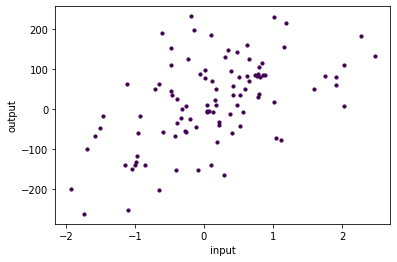

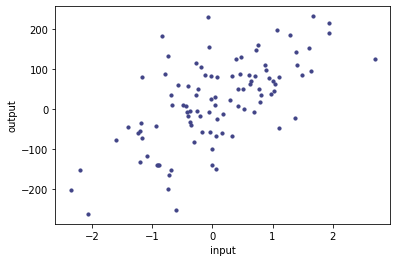

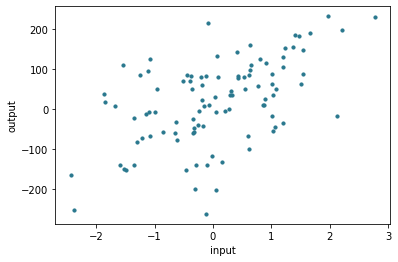

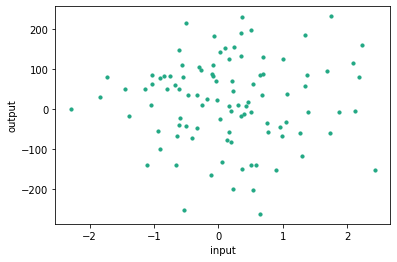

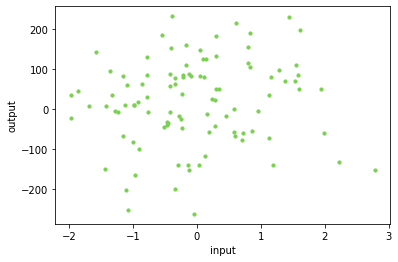

In [16]:
import matplotlib.pyplot as plt
for i in range(0,5):
  cmap = plt.get_cmap("viridis")
  plt.scatter(X[:,i],y,color=cmap(0.2*i),s=10)
  # plt.scatter(X_train[:,i],y_train,color=cmap(0.2*i),s=10)
  plt.xlabel("input")
  plt.ylabel("output")
  plt.show()

### Data pre-processing 

In [17]:
import numpy as np
X_train1=X_train/2.8
y_train1=y_train/262
X_test1=X_test/2.8
y_test1=y_test/262
print(np.max(y_train1))
print(np.min(y_train1))


0.8846873833965454
-0.9988484518751607


## Model Definition

Using TensorFlow, build a model with the following definition:
> Input of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 1 \\

Use Mean Square Error Loss and Stochaistic Gradient Descent (SGD) Optimizer

Use Gradient Decay with appropriate parameters

In [42]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(5, input_dim=5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))
opt=tf.keras.optimizers.SGD(learning_rate=0.0048, momentum=0.0, nesterov=False, name="SGD")
model.compile( loss=tf.keras.losses.MeanSquaredError())
history=model.fit(X_train1,y_train1,validation_split=0.33, epochs=100, batch_size=1,verbose=0)
# Your code here

## Plot Loss

Using matplotlib visualise how the loss (both validation and training) is changing, use this information to retrain the model with appropriate parameters.<br>We ideally want the loss to be constant over the last few iterations.

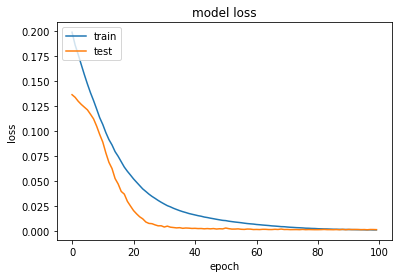

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Evaluation Metrics
Use the R2 Score function implemented in the first assignment to evaluate the performance of the model.

In [44]:
import numpy as np
y_pred=model.predict(X_test1)
from sklearn.metrics import r2_score
accu = r2_score(y_test1, y_pred) 
print("Accuracy:", accu)

Accuracy: 0.9939404664517503


## Your own custom model
Build a custom model of your own choice.<br>
Describe it in detail in Markdown/Latex in the cell below.<br>
Visualise the loss, as before.

## Generate dataset and pre-processing

In [49]:
X, y = datasets.make_regression(n_samples=1000, n_features=5, noise=5, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
X_train1=X_train/4.5
y_train1=y_train/500
X_test1=X_test/4.5
y_test1=y_test/500
print(np.max(y_train1))
print(np.min(y_train1))



0.832416491992364
-0.918640856019687


## My model have 4 hidden layers which consists 12,7,5,3 neurons respectively

I have used adam optimizer and mean squared error as loss

In [53]:
my_model = Sequential()
my_model.add(Dense(12, input_dim=5, activation='relu'))
my_model.add(Dense(7, activation='relu'))
my_model.add(Dense(5, activation='relu'))
my_model.add(Dense(3, activation='relu'))
my_model.add(Dense(1))
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
my_model.compile( loss=tf.keras.losses.MeanSquaredError())
new_history=my_model.fit(X_train1,y_train1,validation_split=0.33, epochs=50, batch_size=1, verbose=0)

## Loss_plot

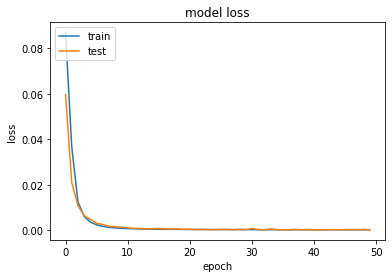

In [54]:
plt.plot(new_history.history['loss'])
plt.plot(new_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### r2_score

In [55]:
predicitons=my_model.predict(X_test1)
from sklearn.metrics import r2_score
accu = r2_score(y_test1,predicitons) 
print("Accuracy:", accu)

Accuracy: 0.9971830862787954
